# Statistics Lab

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# hangi veriden hangi plot cikar
# barplot: kategorik feature
# histogram: single numeric feature
# iki numericten scatterplot cikar.
# histogrami cizilenin boxplotu da cizilir

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
df = sns.load_dataset("mpg")

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [1]:
# std cok yuksek olan mesela displacement, veri cok daglmis demek. yanlis veri olabilir yani.

# kategorik olanlar: 

In [8]:
df.info()  # object yaziyorsa kategoriktir. ama yukarıda cylinders int yaziyor. ama o sayisal
# gorunse de kategorik aslinda. kategoriklerde bar ve pie chartlar yapılabilir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


# Seaborn.countplot()

seaborn.countplot() method is used to show the counts of observations in each **categorical bin** using bars.

Syntax : seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)

https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

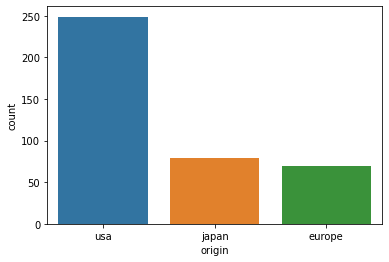

In [10]:
# kat veriden bar chart yapalım
# ilk yol: sns.countplot
# countplot kategorilerin frekanslarını/sayılarını verdi
sns.countplot(x= "origin", data = df);  # son ; grafik üstü matplotlib yazısnı kaldırmak icin

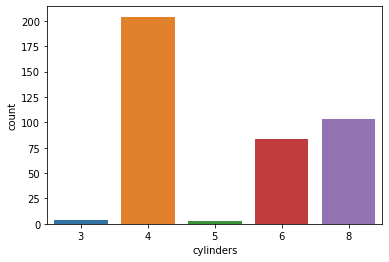

In [11]:
sns.countplot(x= "cylinders", data = df);

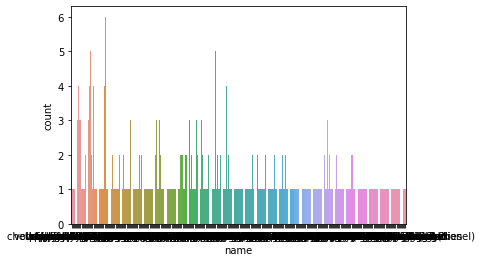

In [12]:
sns.countplot(x= "name", data = df);  # mantiksiz olur

# seaborn.barplot() method

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose **a categorical column for the x-axis and a numerical column for the y-axis**, and we see that it creates a plot taking a mean per categorical column.

Syntax : seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000002BC3EB5C4C8>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor=’.26′, errwidth=None, capsize=None, dodge=True, ax=None, **kwargs,) 

**Following steps are used :**

Import Seaborn

Load Dataset from Seaborn as it contain good collection of datasets.

Plot Bar graph using seaborn.barplot() method.

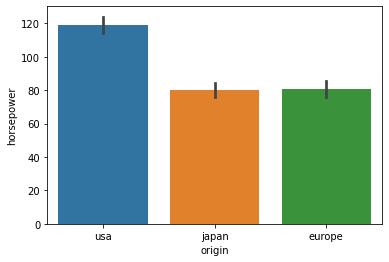

In [14]:
# ikinci yol barplot
sns.barplot(x= "origin", y="horsepower", data = df);  # bar plotta fark her iki eksende iki farklı degisken var
# sadece frekans saydirmak icin countplot; ama kategori bazında hesaplama yapmak icin barplot

# barplotta üstteki cizgiler bunun bir istatistiki hesaplama oldugunu gosterir. confidence interval bu default olarak,
# ama std de yapılabilir.

# sns.barplot : Docstring: Show point estimates and confidence intervals as rectangular bars.

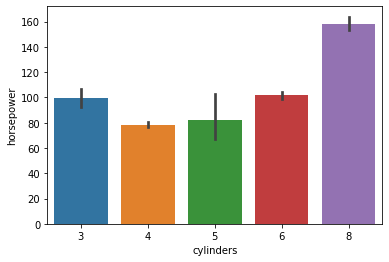

In [15]:
sns.barplot(x= "cylinders", y="horsepower", data = df);

# mesela güven araligi 5 silindirde yuksek. yani sample populationu temsil etmede (guven) zayıf
# zaten listemizde en az veri 5 silindire ait

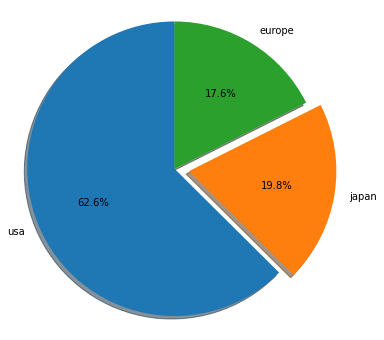

In [16]:
# 3. pie chart icin

labels = df.origin.unique()
sizes = df.origin.value_counts()
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Simdi numeric features

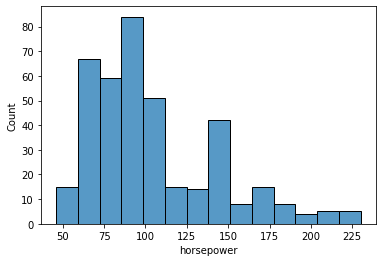

In [17]:
# sadece 1 numeric featuredan ya histogram ya boxplotu cizilir.

sns.histplot(x="horsepower", data=df);

# horsepower featureunda mean 104 median 93.5. yani positive skewness /right skewness. Asagida da kyruk saga 
# dogru gittigi belli oluyor

# asagidan arabaların nerelerde yogunlastigi, dagilimin genel ozelligi vb vb anlasiliyor 

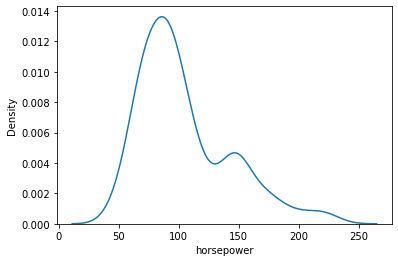

In [18]:
sns.kdeplot(x="horsepower", data=df);

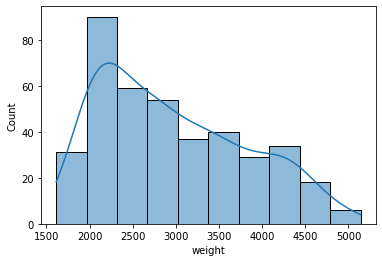

In [10]:
sns.histplot(x="weight", data=df, kde = True);

# right skeweed, positive skewness, mean > median 

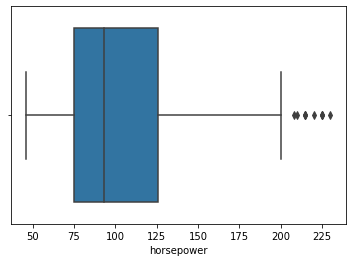

In [19]:
sns.boxplot(x="horsepower", data=df);
# mean, median ve outlers gorunuyor. Ama histogram daha iyi fikir veriyor.
# box plot temel statistics'leri bir bakışta görmemizi sağlıyor. Bu anlamda dataya ilk bakış için boxplot kullanırız

In [12]:
df["horsepower"].describe()
# karşılaştırmak için df horsepowerın describeı ile bakabiliriz.

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

Box plot bize en fazla istatistiksel bilgi veren plottur.
Sayısal veri gruplarını çeyreklerine göre grafiksel olarak gösteren bir yöntemdir.
Bir box plot genellikle medyanı, 25. ve 75. yüzdelikleri ve outlier'ları gösterir.

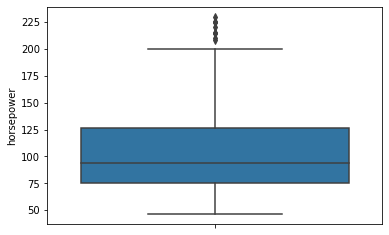

In [20]:
# boxplotu dik yapmak icin x yerine y

sns.boxplot(y="horsepower", data=df);

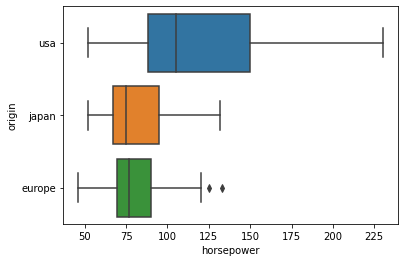

In [21]:
# farklı horsepowerların boxplotunu cizdirebiliriz
sns.boxplot(x="horsepower", y= "origin", data=df);

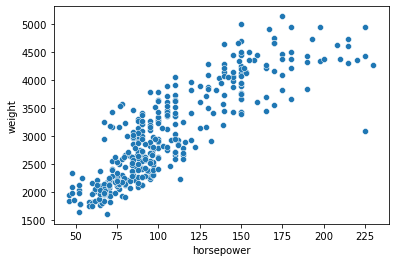

In [24]:
sns.scatterplot(x="horsepower", y="weight", data = df);

# 2 numeric features
# positive-strong bir ilişki var
# corr : 0.86 (iki asagida df.corr)

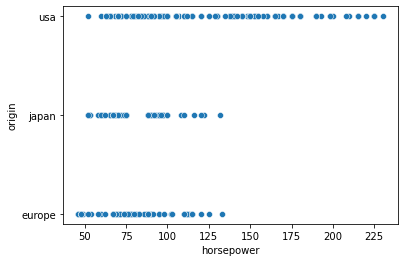

In [25]:
# herse cizilir ama mantkli olmaz. mesela horsepower ve origin. bir kateg br numeric
sns.scatterplot(x="horsepower", y="origin", data = df);
# yorumlanır bu da ama zor ve ideal degil

In [26]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


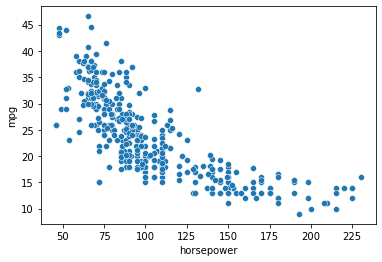

In [27]:
sns.scatterplot(x="horsepower", y="mpg", data = df);
# negatif guclu

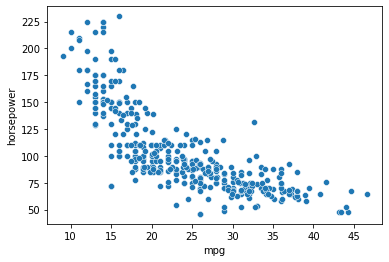

In [28]:
sns.scatterplot(x="mpg", y="horsepower", data = df);

Bu arada x ve y eksenlerine atayacağınız feature'ları birbiri ile değiştirirseniz grafiğin sağ alt köşesi sol üst köşeye, sol üst köşesi sağ alt köşeye çevrilecektir. Dolayısıyla beklendiği gibi correlasyon değeri hakkında bize fikir veren görüntü değişmez

# DIAMONDS DATASET

In [20]:
df2 = sns.load_dataset("diamonds")

In [31]:
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


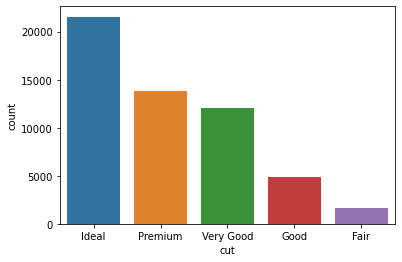

In [33]:
sns.countplot(x= "cut", data = df2);

# en cok ideal kategorisindeki diamonds satiliyormus

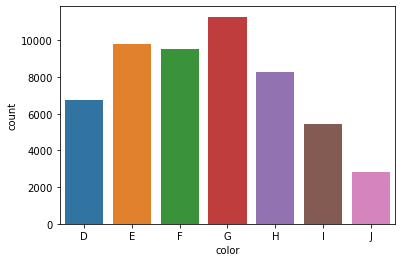

In [22]:
sns.countplot(x="color", data=df2);

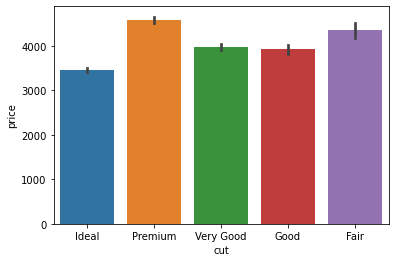

In [34]:
sns.barplot(x= "cut", y="price", data = df2);

# en pahalısı premum
# premium en pahali ama 2. en cok satan
# ideal en ucuz ve en cok satan


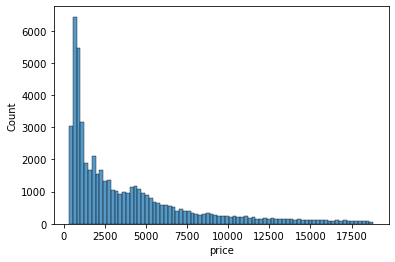

In [36]:
# fiyat dagilimi histplot ile goruruz
sns.histplot(x="price", data=df2);

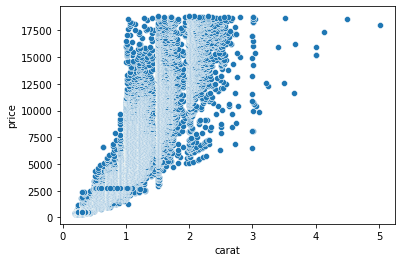

In [38]:
sns.scatterplot(x= "carat", y="price", data = df2);

# karat - p iliskisi icin.

In [39]:
df2.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000
